# **Análisis de Datos de Clientes de Tarjetas de Crédito usando Clustering**


https://www.kaggle.com/datasets/mian91218/credit-card-customer-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv("credit_card_customer_data.csv")
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
data = data.drop(columns=["Sl_No", "Customer Key"])
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
pca = PCA(n_components=4)
pca.fit(data_scaled)

data_pca = pca.transform(data_scaled)

In [7]:
data_pca

array([[ 0.50129079,  0.52482909, -1.89586173, -1.20058151],
       [-1.45956008,  3.10558756,  0.9068019 , -0.4110515 ],
       [ 0.52579466,  0.82397914, -0.0890302 ,  1.03311934],
       ...,
       [ 2.85144378,  2.98308097, -0.0448878 , -0.3025329 ],
       [ 4.17825796,  4.58293019,  0.60533647, -0.57318836],
       [ 3.16042563,  4.35101851,  0.25437735, -0.1111198 ]])

In [11]:
pca_df = pd.DataFrame(data_pca, columns=["Dimensión 1","Dimensión 2", "Dimensión 3", "Dimensión 4"])
pca_df.head(10)

,Dimensión 1,Dimensión 2,Dimensión 3,Dimensión 4
0,0.501291,0.524829,-1.895862,-1.200582
1,-1.459560,3.105588,0.906802,-0.411052
2,0.525795,0.823979,-0.089030,1.033119
3,-0.362294,0.128123,-0.558215,0.729885
4,1.266228,3.668708,0.099999,-0.505571
5,-1.997304,0.665038,-0.260150,0.729732
6,1.147495,3.349963,-0.369645,-0.821562
7,-0.695324,0.064917,-1.898606,0.194751
8,-1.258442,0.248553,-1.691161,-0.091647
9,-1.747152,0.418565,-0.361157,1.129226


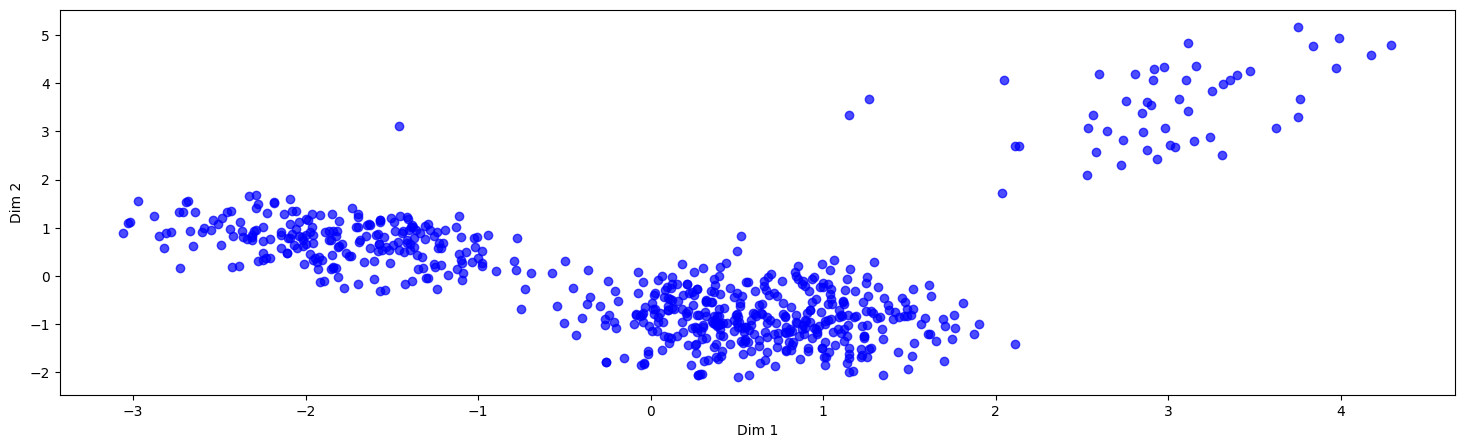

In [12]:
plt.figure(figsize=(18,5))
plt.scatter(pca_df["Dimensión 1"], pca_df["Dimensión 2"], alpha=0.7, color="blue")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [13]:
pca.components_

array([[ 0.48885901,  0.59767943,  0.28049227,  0.11178284, -0.55912866],
       [ 0.40323959,  0.03017103, -0.58658661,  0.66516108,  0.22352726],
       [-0.00346147,  0.28498293,  0.6135219 ,  0.3049481 ,  0.67035086],
       [-0.30861651,  0.74135216, -0.44527763, -0.31838769,  0.23560546]])

In [14]:
factors = pd.DataFrame(pca.components_, columns=data.columns, index=["Dimensión 1","Dimensión 2", "Dimensión 3", "Dimensión 4"])
factors

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Dimensión 1,0.488859,0.597679,0.280492,0.111783,-0.559129
Dimensión 2,0.403240,0.030171,-0.586587,0.665161,0.223527
Dimensión 3,-0.003461,0.284983,0.613522,0.304948,0.670351
Dimensión 4,-0.308617,0.741352,-0.445278,-0.318388,0.235605


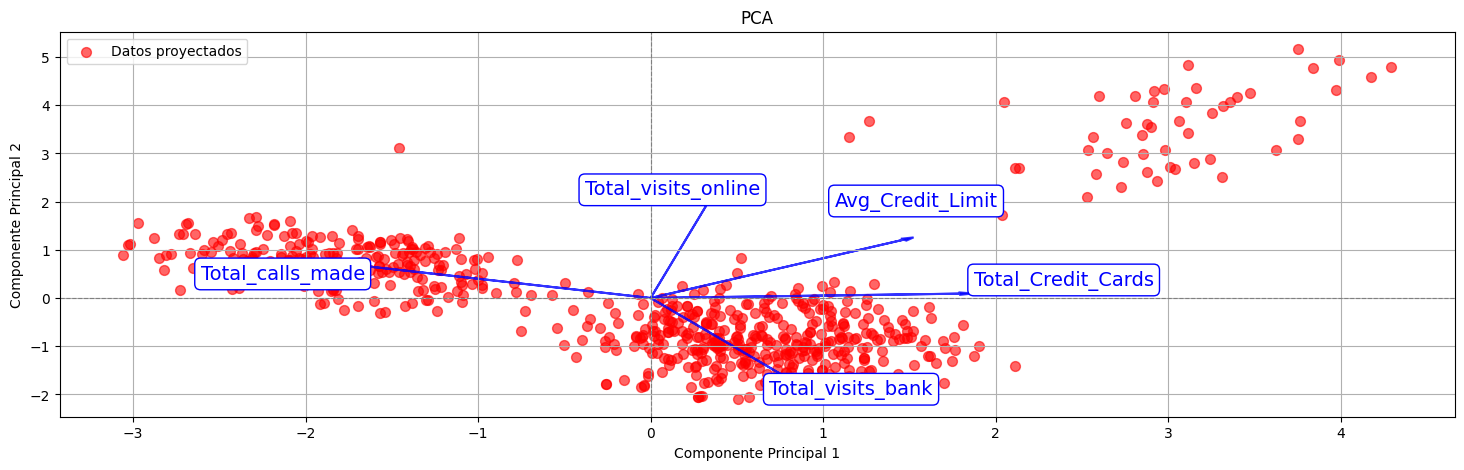

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Datos proyectados en los primeros dos componentes principales
dim1 = pca_df['Dimensión 1']
dim2 = pca_df['Dimensión 2']

# 2. Crear la figura del biplot mejorado
plt.figure(figsize=(18, 5))

# Graficar los datos proyectados con un solo color (amarillo)
plt.scatter(dim1, dim2, alpha=0.6, color='red', s=50, label='Datos proyectados')


# 3. Añadir flechas y etiquetas de características con ajuste dinámico
for i, feature in enumerate(data.columns):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3,
              color='blue', alpha=0.8, head_width=0.05, linewidth=1.5)

    # Ajustar la posición de las etiquetas con mayor separación y desplazamiento aleatorio
    x_text = pca.components_[0, i] * 4 + np.random.uniform(-0.5, 0.5)
    y_text = pca.components_[1, i] * 4 + np.random.uniform(-0.5, 0.5)

    # Añadir la etiqueta con fondo blanco para mayor legibilidad
    plt.text(x_text, y_text, feature, color='blue', fontsize=14, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

# 4. Personalizar el gráfico
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.grid()
plt.legend()
plt.show()

## KMEANS

In [17]:
reduced_data_df = pd.DataFrame(data_pca[:, :2], columns=["Dimensión 1", "Dimensión 2"])

In [18]:
reduced_data_df

,Dimensión 1,Dimensión 2
0,0.501291,0.524829
1,-1.459560,3.105588
2,0.525795,0.823979
3,-0.362294,0.128123
4,1.266228,3.668708
...,...,...
655,3.038539,2.666249
656,2.567247,3.341750
657,2.851444,2.983081
658,4.178258,4.582930


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42 )
clusters = kmeans.fit_predict(reduced_data_df)

In [21]:
clusters

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

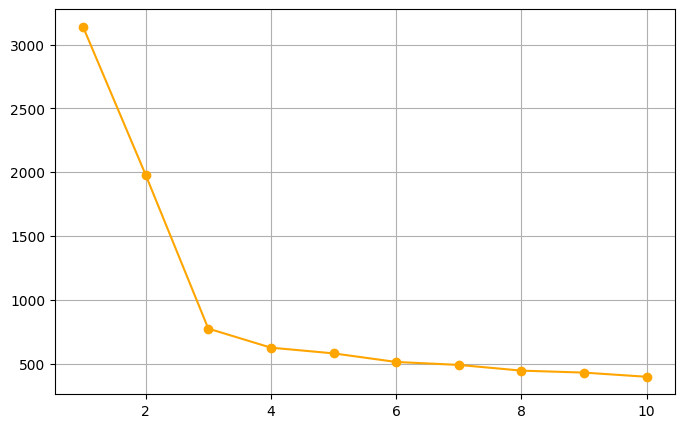

In [25]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_pca)
  sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker="o", color="orange")
plt.grid()
plt.show()

In [30]:
cluster

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
reduced_data_df

,Dimensión 1,Dimensión 2
0,0.501291,0.524829
1,-1.459560,3.105588
2,0.525795,0.823979
3,-0.362294,0.128123
4,1.266228,3.668708
...,...,...
655,3.038539,2.666249
656,2.567247,3.341750
657,2.851444,2.983081
658,4.178258,4.582930


In [33]:
reduced_data_df['Cluster'] = clusters

<Figure size 2000x800 with 0 Axes>

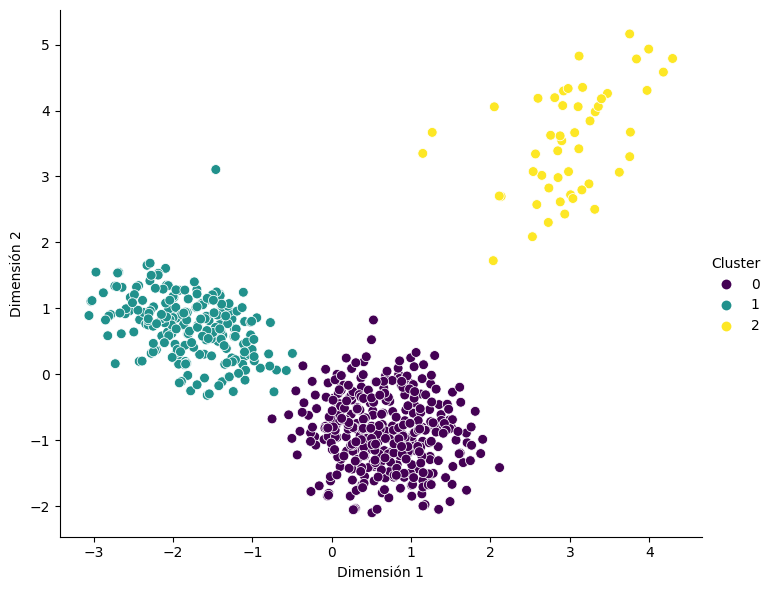

In [34]:
plt.figure(figsize=(20,8))
sns.relplot(
    x="Dimensión 1",
    y="Dimensión 2",
    data=reduced_data_df,
    hue="Cluster",
    palette="viridis",
    height=6,
    aspect=1.2,
    s=50
)

In [35]:
cluster_names = {
    0: "Intermedios y con muchas visitias físicas",
    1: "Poco límite y muchas reclamaciones telefónicas",
    2: "Premium y digitales"
}

reduced_data_df["Cluster Nombre"] = reduced_data_df["Cluster"].map(cluster_names)


In [36]:
reduced_data_df

,Dimensión 1,Dimensión 2,Cluster,Cluster Nombre
0,0.501291,0.524829,0,Intermedios y con muchas visitias físicas
1,-1.459560,3.105588,1,Poco límite y muchas reclamaciones telefónicas
2,0.525795,0.823979,0,Intermedios y con muchas visitias físicas
3,-0.362294,0.128123,0,Intermedios y con muchas visitias físicas
4,1.266228,3.668708,2,Premium y digitales
...,...,...,...,...
655,3.038539,2.666249,2,Premium y digitales
656,2.567247,3.341750,2,Premium y digitales
657,2.851444,2.983081,2,Premium y digitales
658,4.178258,4.582930,2,Premium y digitales


<Figure size 2000x800 with 0 Axes>

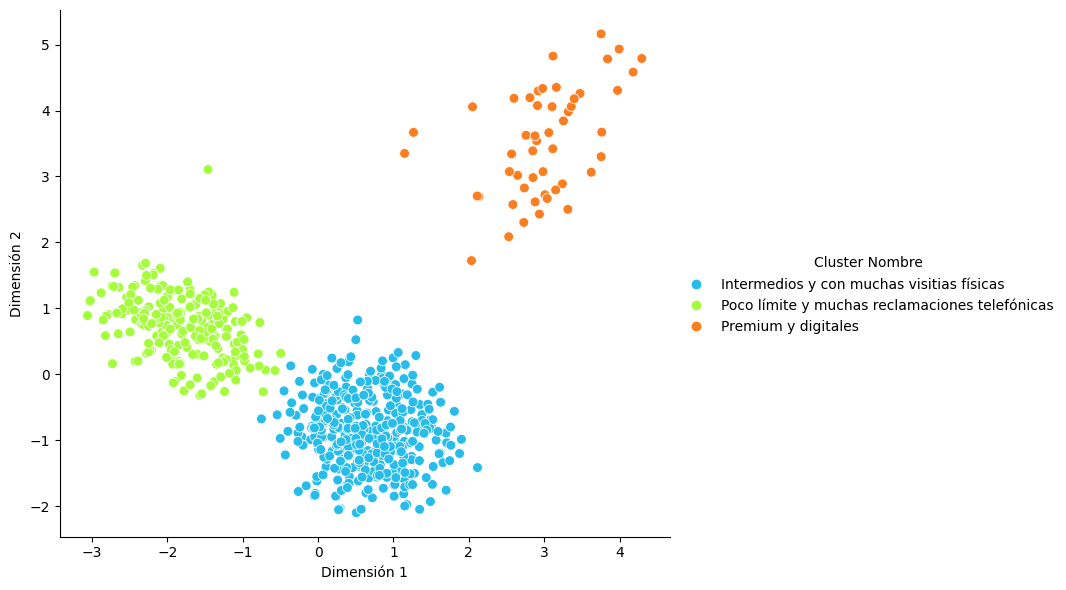

In [37]:
plt.figure(figsize=(20,8))
sns.relplot(
    x="Dimensión 1",
    y="Dimensión 2",
    data=reduced_data_df,
    hue="Cluster Nombre",
    palette="turbo",
    height=6,
    aspect=1.2,
    s=50
)